# Loading data

All Samples are here:
all_matched_samples.gct

In [17]:
samples_file = "all_matched_samples.gct"

In [18]:
import pandas as pd
import numpy as np
import cuzcatlan as cusca
df = pd.read_table(samples_file, skiprows=2, index_col=0)
Description = df['Description']
df.drop('Description', axis=1, inplace=True)
df.shape

(55490, 224)

# Filtering data

<div class="well well-sm">
Applying a varaiance filter. Filtering out genes with lower standar deviation than 100. Mean std is about 874 for this dataset.
</div>

In [19]:
std = df.std(axis=1)
min_std = 100
# mean = df.mean(axis=1)
new_std = std[std > min_std]
print("{} genes were filtered out -- they had a Standard Deviation lower than {} (mean std was ~{})".format(std.count() - new_std.count(), min_std, int(std.mean()) ))
print("New gene lengths is {}".format(new_std.count()))
filtered_df = df.ix[new_std.index]
filtered_df.insert(loc=0,column='Description', value = Description.ix[new_std.index])
filtered_df

39151 genes were filtered out -- they had a Standard Deviation lower than 100 (mean std was ~874)
New gene lengths is 16339


Description  \
Name                                                              
TSPAN6                                            tetraspanin 6   
TNMD                                                tenomodulin   
DPM1          dolichyl-phosphate mannosyltransferase subunit...   
SCYL3                                  SCY1 like pseudokinase 3   
C1orf112                    chromosome 1 open reading frame 112   
FGR              FGR proto-oncogene, Src family tyrosine kinase   
CFH                                         complement factor H   
FUCA2                            fucosidase, alpha-L- 2, plasma   
GCLC                glutamate-cysteine ligase catalytic subunit   
NFYA               nuclear transcription factor Y subunit alpha   
STPG1                    sperm tail PG-rich repeat containing 1   
NIPAL3                            NIPA like domain containing 3   
LAS1L                     LAS1 like, ribosome biogenesis factor   
ENPP4         ectonucleotide pyrophosphatase/phosphodiestera...   
SEMA3F                                            semaphorin 3F   
CFTR          cystic fibrosis transmembrane conductance regu...   
ANKIB1               ankyrin repeat and IBR domain containing 1   
CYP51A1          cytochrome P450 family 51 subfamily A member 1   
KRIT1                          KRIT1, ankyrin repeat containing   
RAD52                         RAD52 homolog, DNA repair protein   
BAD                       BCL2 associated agonist of cell death   
LAP3                                   leucine aminopeptidase 3   
CD99                             CD99 molecule (Xg blood group)   
HS3ST1         heparan sulfate-glucosamine 3-sulfotransferase 1   
AOC1                         amine oxidase, copper containing 1   
MAD1L1                     MAD1 mitotic arrest deficient like 1   
LASP1                                     LIM and SH3 protein 1   
SNX11                                          sorting nexin 11   
TMEM176A                             transmembrane protein 176A   
M6PR             mannose-6-phosphate receptor, cation dependent   
...                                                         ...   
AC133065.6                                                  NaN   
AC022107.1                                                  NaN   
AC005831.1                                                  NaN   
AC026401.3                                                  NaN   
AC093908.2                                                  NaN   
MIR4697HG                                     MIR4697 host gene   
AC233723.2                                                  NaN   
AP001528.3                                                  NaN   
AC000123.3                                                  NaN   
Z95331.1                                                    NaN   
AP000648.3                                                  NaN   
AC245369.3                  Immunoglobulin heavy variable 1-69D   
CCDC163                       coiled-coil domain containing 163   
SH3PXD2A-AS1                           SH3PXD2A antisense RNA 1   
LINC01232           long intergenic non-protein coding RNA 1232   
PAGR1                PAXIP1 associated glutamate rich protein 1   
LINC00294            long intergenic non-protein coding RNA 294   
GSEC            G-quadruplex forming sequence containing lncRNA   
FOXCUT           FOXC1 upstream transcript (non-protein coding)   
N4BP2L2-IT2                        N4BPL2 intronic transcript 2   
TRG-AS1             T-cell receptor gamma locus antisense RNA 1   
AC007878.1                                                  NaN   
AL133410.3                                                  NaN   
AC018645.3                                                  NaN   
HELLPAR                    HELLP associated long non-coding RNA   
SNHG4                           small nucleolar RNA host gene 4   
CICP14          capicua transcriptional repressor pseudogene 14   
EBLN3P        endogenous Bornavi

In [20]:
import cuzcatlan as cusca
cusca.df2gct(filtered_df, name='TCGA_BRCA_all_matched_var_filtered.gct')

---

# Looking at the metadata

https://raw.githubusercontent.com/genepattern/download_from_gdc/master/data/metadata.cart.2017-12-21T21_41_22.870798.json

In [21]:
# These are all the patients
patients = list(np.unique([x[:-3] for x in list(filtered_df.drop('Description', axis=1))]))
print(patients)
len(patients)

['TCGA-A7-A0CE', 'TCGA-A7-A0CH', 'TCGA-A7-A0D9', 'TCGA-A7-A0DB', 'TCGA-A7-A0DC', 'TCGA-A7-A13E', 'TCGA-A7-A13F', 'TCGA-A7-A13G', 'TCGA-AC-A23H', 'TCGA-AC-A2FB', 'TCGA-AC-A2FF', 'TCGA-AC-A2FM', 'TCGA-BH-A0AU', 'TCGA-BH-A0AY', 'TCGA-BH-A0AZ', 'TCGA-BH-A0B3', 'TCGA-BH-A0B5', 'TCGA-BH-A0B7', 'TCGA-BH-A0B8', 'TCGA-BH-A0BA', 'TCGA-BH-A0BC', 'TCGA-BH-A0BJ', 'TCGA-BH-A0BM', 'TCGA-BH-A0BQ', 'TCGA-BH-A0BT', 'TCGA-BH-A0BV', 'TCGA-BH-A0BW', 'TCGA-BH-A0BZ', 'TCGA-BH-A0C0', 'TCGA-BH-A0C3', 'TCGA-BH-A0DD', 'TCGA-BH-A0DG', 'TCGA-BH-A0DH', 'TCGA-BH-A0DK', 'TCGA-BH-A0DL', 'TCGA-BH-A0DO', 'TCGA-BH-A0DP', 'TCGA-BH-A0DQ', 'TCGA-BH-A0DT', 'TCGA-BH-A0DV', 'TCGA-BH-A0DZ', 'TCGA-BH-A0E0', 'TCGA-BH-A0E1', 'TCGA-BH-A0H5', 'TCGA-BH-A0H7', 'TCGA-BH-A0H9', 'TCGA-BH-A0HA', 'TCGA-BH-A0HK', 'TCGA-BH-A18J', 'TCGA-BH-A18K', 'TCGA-BH-A18L', 'TCGA-BH-A18M', 'TCGA-BH-A18N', 'TCGA-BH-A18P', 'TCGA-BH-A18Q', 'TCGA-BH-A18R', 'TCGA-BH-A18S', 'TCGA-BH-A18U', 'TCGA-BH-A18V', 'TCGA-BH-A1EN', 'TCGA-BH-A1EO', 'TCGA-BH-A1ET', 'TCGA-B

112

---

##  (abandoned) filtering metadata

In [6]:
# Step through all of the metadata and only save the ones that are associated to the selected patients 

import json
from pprint import pprint
import urllib.request
import validators

link = "https://raw.githubusercontent.com/genepattern/download_from_gdc/master/data/metadata.cart.2017-12-21T21_41_22.870798.json"

if validators.url(link):
    urlfile, __ = urllib.request.urlretrieve(link)
else:
    urlfile = link
temp = open(urlfile)

full_metadata = json.load(temp)
patients_metadata = []

for item in full_metadata:
    if item['cases'][0]['samples'][0]['portions'][0]['analytes'][0]['aliquots'][0]['submitter_id'][:12] in patients:
        patients_metadata.append(item)
len(patients_metadata)

232

In [7]:
file = open('patients_metadata.json','w')
json.dump(patients_metadata, file)

## Loading pre-curated metadata

In [22]:
# Loading metadata from:
# http://gdac.broadinstitute.org/runs/stddata__2016_01_28/data/BRCA/20160128/gdac.broadinstitute.org_BRCA.Clinical_Pick_Tier1.Level_4.2016012800.0.0.tar.gz
# Which is on: http://firebrowse.org/?cohort=BRCA&download_dialog=true

curated_metadata = pd.read_table('BRCA.clin.merged.picked_from_firebrowse.txt', index_col=0)
simplified_t_stage = [i[0:2] for i in curated_metadata.ix['pathology_T_stage']]
curated_metadata.loc['simplified_t_stage'] = simplified_t_stage
curated_metadata

tcga-5l-aat0  \
Hybridization REF                                                      
Composite Element REF                                          value   
years_to_birth                                                    42   
vital_status                                                       0   
days_to_death                                                    NaN   
days_to_last_followup                                           1477   
tumor_tissue_site                                             breast   
pathologic_stage                                           stage iia   
pathology_T_stage                                                 t2   
pathology_N_stage                                                 n0   
pathology_M_stage                                                 m0   
gender                                                        female   
date_of_initial_pathologic_diagnosis                            2010   
days_to_last_known_alive                                         NaN   
radiation_therapy                                                yes   
histological_type                     infiltrating lobular carcinoma   
number_of_lymph_nodes                                              0   
race                                                           white   
ethnicity                                         hispanic or latino   
simplified_t_stage                                                t2   

                                                        tcga-5l-aat1  \
Hybridization REF                                                      
Composite Element REF                                          value   
years_to_birth                                                    63   
vital_status                                                       0   
days_to_death                                                    NaN   
days_to_last_followup                                           1471   
tumor_tissue_site                                             breast   
pathologic_stage                                            stage iv   
pathology_T_stage                                                 t2   
pathology_N_stage                                                 n0   
pathology_M_stage                                                 m1   
gender                                                        female   
date_of_initial_pathologic_diagnosis                            2010   
days_to_last_known_alive                                         NaN   
radiation_therapy                                                 no   
histological_type                     infiltrating lobular carcinoma   
number_of_lymph_nodes                                              0   
race                                                           white   
ethnicity                                         hispanic or latino   
simplified_t_stage                                                t2   

                                                       tcga-a1-a0sp  \
Hybridization REF                                                     
Composite Element REF                                         value   
years_to_birth                                                   40   
vital_status                                                      0   
days_to_death                                                   NaN   
days_to_last_followup                                           584   
tumor_tissue_site                                            breast   
pathologic_stage                                          stage iia   
pathology_T_stage                                                t2   
pathology_N_stage                                           n0 (i-)   
pathology_M_stage                                                m0   
gender                                                       female   
date_of_initial_pathologic_diagnosis                           2007   
days_to_last_known_alive            

In [23]:
patients[0].lower() in list(curated_metadata)

True

In [24]:
list(curated_metadata)

['tcga-5l-aat0',
 'tcga-5l-aat1',
 'tcga-a1-a0sp',
 'tcga-a2-a04v',
 'tcga-a2-a04y',
 'tcga-a2-a0cq',
 'tcga-a2-a1g4',
 'tcga-a2-a25a',
 'tcga-a7-a0cd',
 'tcga-a7-a13g',
 'tcga-a7-a26e',
 'tcga-a7-a26f',
 'tcga-a7-a26h',
 'tcga-a7-a26i',
 'tcga-a7-a2kd',
 'tcga-a7-a3j1',
 'tcga-a7-a426',
 'tcga-a7-a5zx',
 'tcga-a8-a06t',
 'tcga-a8-a06u',
 'tcga-a8-a07e',
 'tcga-a8-a084',
 'tcga-a8-a08f',
 'tcga-a8-a08s',
 'tcga-a8-a091',
 'tcga-a8-a093',
 'tcga-a8-a09c',
 'tcga-a8-a09e',
 'tcga-a8-a09i',
 'tcga-a8-a09k',
 'tcga-ac-a3w5',
 'tcga-ac-a3w6',
 'tcga-ac-a5ei',
 'tcga-ac-a5xs',
 'tcga-ac-a62x',
 'tcga-ao-a0ji',
 'tcga-ao-a1kt',
 'tcga-aq-a0y5',
 'tcga-aq-a54n',
 'tcga-aq-a54o',
 'tcga-aq-a7u7',
 'tcga-ar-a1am',
 'tcga-ar-a1ar',
 'tcga-ar-a2ll',
 'tcga-ar-a2lr',
 'tcga-ar-a5qm',
 'tcga-b6-a0i8',
 'tcga-bh-a0b6',
 'tcga-bh-a0do',
 'tcga-bh-a0ea',
 'tcga-bh-a18h',
 'tcga-bh-a1f5',
 'tcga-bh-a8fy',
 'tcga-c8-a1hl',
 'tcga-d8-a146',
 'tcga-e2-a158',
 'tcga-e2-a15o',
 'tcga-e2-a1bc',
 'tcga-e2-a1l8

## clustering by radiation therapy (didn't work)

count     1002
unique       2
top        yes
freq       556
Name: radiation_therapy, dtype: object

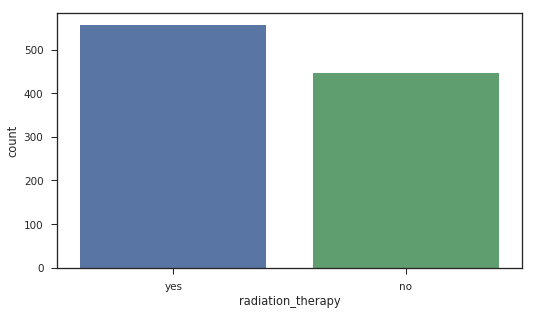

In [42]:
%matplotlib inline 
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,4.5), dpi=75)
sns.countplot(x =curated_metadata.ix['radiation_therapy'])
curated_metadata.ix['radiation_therapy'].describe()

In [27]:
# Sort patients by radiation therapy
curated_metadata
curated_metadata.reindex_axis(sorted(curated_metadata.columns), axis=1)

tcga-3c-aaau  \
Hybridization REF                                                      
Composite Element REF                                          value   
years_to_birth                                                    55   
vital_status                                                       0   
days_to_death                                                    NaN   
days_to_last_followup                                           4047   
tumor_tissue_site                                             breast   
pathologic_stage                                             stage x   
pathology_T_stage                                                 tx   
pathology_N_stage                                                 nx   
pathology_M_stage                                                 mx   
gender                                                        female   
date_of_initial_pathologic_diagnosis                            2004   
days_to_last_known_alive                                         NaN   
radiation_therapy                                                 no   
histological_type                     infiltrating lobular carcinoma   
number_of_lymph_nodes                                              4   
race                                                           white   
ethnicity                                     not hispanic or latino   
simplified_t_stage                                                tx   

                                                       tcga-3c-aali  \
Hybridization REF                                                     
Composite Element REF                                         value   
years_to_birth                                                   50   
vital_status                                                      0   
days_to_death                                                   NaN   
days_to_last_followup                                          4005   
tumor_tissue_site                                            breast   
pathologic_stage                                          stage iib   
pathology_T_stage                                                t2   
pathology_N_stage                                               n1a   
pathology_M_stage                                                m0   
gender                                                       female   
date_of_initial_pathologic_diagnosis                           2003   
days_to_last_known_alive                                        NaN   
radiation_therapy                                               yes   
histological_type                     infiltrating ductal carcinoma   
number_of_lymph_nodes                                             1   
race                                      black or african american   
ethnicity                                    not hispanic or latino   
simplified_t_stage                                               t2   

                                                       tcga-3c-aalj  \
Hybridization REF                                                     
Composite Element REF                                         value   
years_to_birth                                                   62   
vital_status                                                      0   
days_to_death                                                   NaN   
days_to_last_followup                                          1474   
tumor_tissue_site                                            breast   
pathologic_stage                                          stage iib   
pathology_T_stage                                                t2   
pathology_N_stage                                               n1a   
pathology_M_stage                                                m0   
gender                                                       female   
date_of_initial_pathologic_diagnosis                           2011   
days_to_last_known_alive                                 

In [28]:
# Selecting metadata for only patients in our cohort (i.e., patietns with both normal and cancer tissue)
metadata_patients = [i.upper() for i in list(curated_metadata)]
print(len(metadata_patients), len(patients), len(list(set(metadata_patients) & set(patients))))
lowercase_patients = [i.lower() for i in list(patients)]
metadata_subset = curated_metadata[lowercase_patients]
metadata_subset.rename(columns=lambda x: x.upper(), inplace=True)
metadata_subset

1097 112 112


TCGA-A7-A0CE  \
Hybridization REF                                                     
Composite Element REF                                         value   
years_to_birth                                                   57   
vital_status                                                      0   
days_to_death                                                   NaN   
days_to_last_followup                                          1074   
tumor_tissue_site                                            breast   
pathologic_stage                                          stage iia   
pathology_T_stage                                                t2   
pathology_N_stage                                           n0 (i-)   
pathology_M_stage                                                m0   
gender                                                       female   
date_of_initial_pathologic_diagnosis                           2009   
days_to_last_known_alive                                        NaN   
radiation_therapy                                               yes   
histological_type                     infiltrating ductal carcinoma   
number_of_lymph_nodes                                             0   
race                                                          white   
ethnicity                                    not hispanic or latino   
simplified_t_stage                                               t2   

                                                       TCGA-A7-A0CH  \
Hybridization REF                                                     
Composite Element REF                                         value   
years_to_birth                                                   79   
vital_status                                                      0   
days_to_death                                                   NaN   
days_to_last_followup                                          1079   
tumor_tissue_site                                            breast   
pathologic_stage                                          stage iia   
pathology_T_stage                                                t2   
pathology_N_stage                                           n0 (i-)   
pathology_M_stage                                                m0   
gender                                                       female   
date_of_initial_pathologic_diagnosis                           2009   
days_to_last_known_alive                                        NaN   
radiation_therapy                                                no   
histological_type                     infiltrating ductal carcinoma   
number_of_lymph_nodes                                             0   
race                                                          white   
ethnicity                                    not hispanic or latino   
simplified_t_stage                                               t2   

                                                       TCGA-A7-A0D9  \
Hybridization REF                                                     
Composite Element REF                                         value   
years_to_birth                                                   37   
vital_status                                                      0   
days_to_death                                                   NaN   
days_to_last_followup                                          1139   
tumor_tissue_site                                            breast   
pathologic_stage                                          stage iia   
pathology_T_stage                                                t2   
pathology_N_stage                                           n0 (i-)   
pathology_M_stage                                                m0   
gender                                                       female   
date_of_initial_pathologic_diagnosis                           2009   
days_to_last_known_alive                                        NaN   
radiat

count      78
unique      2
top       yes
freq       45
Name: radiation_therapy, dtype: object

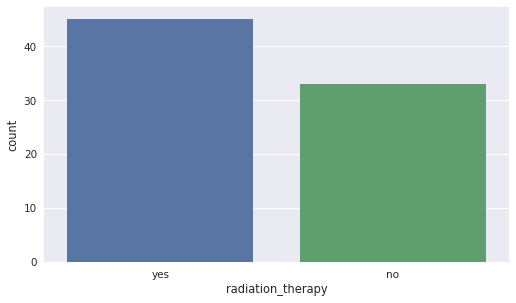

In [29]:
plt.figure(figsize=(8,4.5), dpi=75)
sns.countplot(x =metadata_subset.ix['radiation_therapy'])
metadata_subset.ix['radiation_therapy'].describe()

In [30]:
df = metadata_subset
# df.groupby(df.ix['radiation_therapy']=='yes')
# df = df[df.ix['radiation_therapy'].sort_values().index.values]
# rt = metadata_subset[df.ix['radiation_therapy']=='yes']

# rt = df[df.ix['radiation_therapy']=='yes']
rt = df.loc[:,df.ix['radiation_therapy']=='yes']
nt = df.loc[:,df.ix['radiation_therapy']=='no']

# Taking the first (alphabetical) ten radiation therapy patients and the first (alphabetical) not-radiation therapy patietns:
selected_patients = list(rt)[:10]+list(nt)[:10]
# selected_patients = [i.replace('\n','') for i in selected_patients]
# filtered_df[selected_patients]

# FIX THIS!!:

new_cols = [i if i[0:12] in selected_patients else '' for i in filtered_df]
# new_cols = new_cols.remove('')
# print(new_cols)
patients_to_use = list(filter(lambda a: a != '', new_cols))

In [34]:
renamed_patients = filtered_df[patients_to_use]
# for col in list(renamed_patients):
#     if col[0:12] in list(rt):
#         print(col+'-R')
renamed_patients.rename(lambda col: col+'-R' if col[0:12] in list(rt) else col, axis='columns', inplace=True)
renamed_patients

TCGA-A7-A0CE-01-R  TCGA-A7-A0CE-11-R  TCGA-A7-A0CH-01  \
Name                                                                  
TSPAN6                   8462.0             5404.0           3036.0   
TNMD                       54.0              320.0              0.0   
DPM1                     2408.0             2472.0           1497.0   
SCYL3                    1518.0             1483.0           3030.0   
C1orf112                 2056.0              312.0            730.0   
FGR                       287.0              869.0            173.0   
CFH                      1663.0             5760.0           1531.0   
FUCA2                   10475.0             4397.0           1772.0   
GCLC                     2330.0             2775.0           3522.0   
NFYA                     2776.0             2060.0           3629.0   
STPG1                    1162.0              845.0            904.0   
NIPAL3                   5432.0             4848.0           3319.0   
LAS1L                    4739.0             3778.0           2394.0   
ENPP4                     946.0             1168.0           2695.0   
SEMA3F                   3486.0             5125.0           3911.0   
CFTR                        1.0              279.0             33.0   
ANKIB1                   7688.0             3182.0           3500.0   
CYP51A1                   336.0              227.0            250.0   
KRIT1                    3430.0             2505.0           1893.0   
RAD52                     930.0              573.0            389.0   
BAD                       863.0             2586.0           1004.0   
LAP3                     7414.0             9073.0           6335.0   
CD99                     5696.0            12627.0           7232.0   
HS3ST1                    126.0              347.0            190.0   
AOC1                       27.0               53.0             12.0   
MAD1L1                   3323.0             1909.0            936.0   
LASP1                   13231.0            18957.0          17489.0   
SNX11                    1362.0             1942.0           1290.0   
TMEM176A                 2351.0             5231.0            234.0   
M6PR                     9044.0             4161.0           4002.0   
...                         ...                ...              ...   
AC133065.6                 77.0              301.0             56.0   
AC022107.1                363.0              336.0            221.0   
AC005831.1                 19.0              429.0            108.0   
AC026401.3                461.0              423.0            307.0   
AC093908.2                 69.0               87.0            518.0   
MIR4697HG                  28.0              970.0            228.0   
AC233723.2                107.0              387.0            178.0   
AP001528.3                 46.0              576.0             81.0   
AC000123.3                289.0              146.0            255.0   
Z95331.1                   21.0               38.0             42.0   
AP000648.3                402.0              203.0            184.0   
AC245369.3                324.0              658.0             17.0   
CCDC163                   299.0              483.0            187.0   
SH3PXD2A-AS1               13.0               20.0              4.0   
LINC01232                 144.0              173.0             96.0   
PAGR1                     669.0              418.0            394.0   
LINC00294                 783.0              724.0            303.0   
GSEC                      353.0              144.0             84.0   
FOXCUT                    195.0                6.0              1.0   
N4BP2L2-IT2                10.0              153.0             79.0   
TRG-AS1                    23.0               87.0             18.0   
AC007878.1                 32.0               16.0             32.0   
AL133410.3                 81.0              248.0            316.0   
AC018645.3                174.0       

In [40]:
cusca.df2gct(renamed_patients, name='TCGA_BRCA_selected_matched_var_filtered.gct', add_dummy_descriptions=True)

In [36]:
dataset = 'TCGA_BRCA_selected_matched_var_filtered.gct'

In [19]:
import genepattern
# import cuzcatlan as cusca
# import pandas as pd    
from cuzcatlan import hc_samples

genepattern.GPUIBuilder(hc_samples, name="Hierarchical Clustering of Samples (Columns).", 
                        description="This function performs hierarchical clustering to group samples (columns) with similar phenotypes..",
                        parameters={
                                "distance_metric":{
                                                      "default": "pearson",
                                                      "choices":{'Information Coefficient':"information_coefficient",
                                                                 'City Block (Manhattan or L1-norm)':'manhattan',
                                                                 'Euclidean (L2-norm)':"euclidean",
                                                                 'Pearson Correlation':"pearson",
                                                                 'Uncentered Pearson Correlation':'uncentered_pearson',
                                                                 'Uncentered Pearson Correlation, absolute value':'absolute_uncentered_pearson',
                                                                 'Spearman Correlation':'spearman',
                                                                 "Kendall's Tau": 'kendall',
                                                                 'Cosine distance':'cosine',
                                                                }
                                                     }
                        })

GPUIBuilder(description='This function performs hierarchical clustering to group samples (columns) with similar phenotypes..', function_import='hc_samples', name='Hierarchical Clustering of Samples (Columns).', params=[{'name': 'input_gene_expression', 'label': 'input_gene_expression', 'optional': False, 'default': '', 'description': 'gene expression data filename (.gct file) where rows are genes and columns are samples', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'clustering_type', 'label': 'clustering_type', 'optional': False, 'default': '', 'description': 'single or consensus -- Only single is suported at the moment', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'distance_metric', 'label': 'distance_metric', 'optional': False, 'default': 'pearson', 'description': 'the function to be used when comparing the distance/similarity of the columns in the input_gene_expression dataset', 'hide': False, 'type': 'text', 'kinds': None, 'choices': {'Information Coefficient': 'information_coefficient', 'City Block (Manhattan or L1-norm)': 'manhattan', 'Euclidean (L2-norm)': 'euclidean', 'Pearson Correlation': 'pearson', 'Uncentered Pearson Correlation': 'uncentered_pearson', 'Uncentered Pearson Correlation, absolute value': 'absolute_uncentered_pearson', 'Spearman Correlation': 'spearman', "Kendall's Tau": 'kendall', 'Cosine distance': 'cosine'}}, {'name': 'file_basename', 'label': 'file_basename', 'optional': True, 'default': 'HC_out', 'description': 'the name to use when naming output files', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'clusters_to_highlight', 'label': 'clusters_to_highlight', 'optional': True, 'default': 'None', 'description': 'how many clusters to highlight in the dendrogram', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}])

Currenty clustering_type is being ignored, only 'single' is supported.
Now we will start performing hierarchical clustering, this may take a little while.
----------------------------------------------------------------------
The PDF of this heatmap can be downloaded here:


----------------------------------------------------------------------
The CDF which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------
The ATR which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

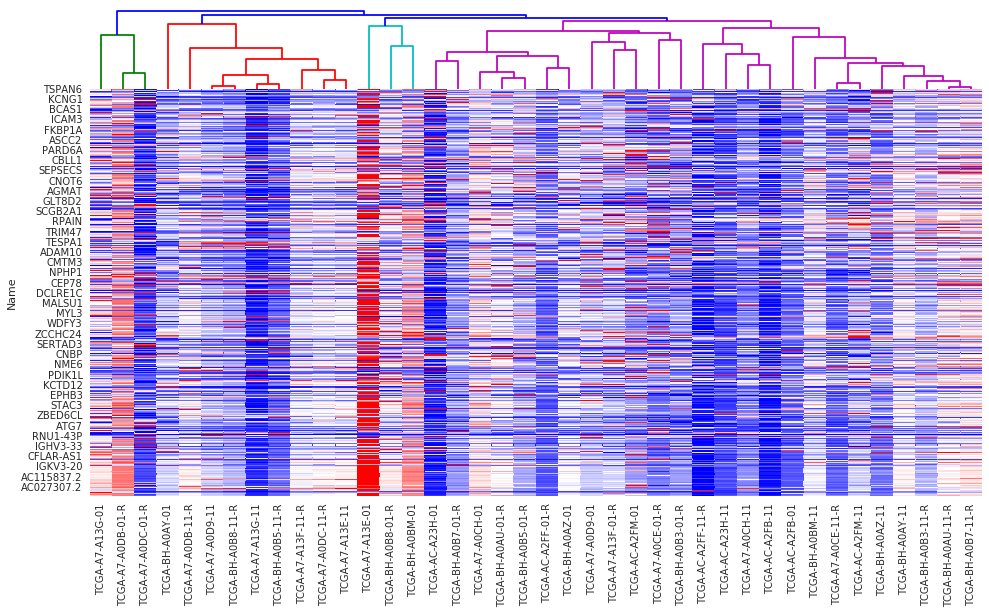

Done with Hierarchical Clustering!


AgglomerativeClustering(affinity=<function my_affinity_p at 0x7f99c18e7268>,
            compute_full_tree='auto', connectivity=None, linkage='average',
            memory=None, n_clusters=2,
            pooling_func=<function mean at 0x7f99f806d598>)

In [37]:
hc_samples(input_gene_expression=dataset, clustering_type="single", distance_metric="pearson", file_basename="HC_out", clusters_to_highlight=4)

In [20]:
import genepattern
import ccalnoir as ccal

from ccalnoir import differential_gene_expression
import pandas as pd
import urllib.request
from ccalnoir import compute_information_coefficient
from ccalnoir import custom_pearson_corr
RANDOM_SEED = 20121020

genepattern.GPUIBuilder(differential_gene_expression, name="Differential gene expression, discrete pheotype.", 
                        description="Sort genes according to their association with a discrete phenotype or class vector.",
                        parameters={
                                "ranking_method":{
                                                      "default": "custom_pearson_corr",
                                                      "choices":{'Pearson Correlation Matching':"custom_pearson_corr",
                                                                 'Information Correlation Matching':"compute_information_coefficient",
                                                                }
                                                     }
                        })

GPUIBuilder(description='Sort genes according to their association with a discrete phenotype or class vector.', function_import='differential_gene_expression', name='Differential gene expression, discrete pheotype.', params=[{'name': 'gene_expression', 'label': 'gene_expression', 'optional': False, 'default': '', 'description': 'GCT filename; data matrix with input gene expression profiles', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'phenotype_file', 'label': 'phenotype_file', 'optional': False, 'default': '', 'description': 'CLS filename; input binary phenotype/class distinction', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'output_filename', 'label': 'output_filename', 'optional': False, 'default': '', 'description': 'Output files will have this name plus extensions .txt and .pdf', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'ranking_method', 'label': 'ranking_method', 'optional': False, 'default': 'custom_pearson_corr', 'description': 'The function to use to compute similarity between phenotypes and gene_expression', 'hide': False, 'type': 'text', 'kinds': None, 'choices': {'Pearson Correlation Matching': 'custom_pearson_corr', 'Information Correlation Matching': 'compute_information_coefficient'}}, {'name': 'max_number_of_genes_to_show', 'label': 'max_number_of_genes_to_show', 'optional': True, 'default': 20, 'description': 'Maximum number of genes to show in the heatmap', 'hide': False, 'type': 'number', 'kinds': None, 'choices': []}, {'name': 'number_of_permutations', 'label': 'number_of_permutations', 'optional': True, 'default': 10, 'description': 'Number of random permutations to estimate statistical significance (p-values and FDRs)', 'hide': False, 'type': 'number', 'kinds': None, 'choices': []}, {'name': 'title', 'label': 'title', 'optional': True, 'default': 'None', 'description': 'The title of the heatmap', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'random_seed', 'label': 'random_seed', 'optional': True, 'default': 20121020, 'description': 'Random number generator seed (can be set to a user supplied integer for reproducibility)', 'hide': False, 'type': 'number', 'kinds': None, 'choices': []}])

Dropping 0 axis-1 slices ...
Computing match score with <function custom_pearson_corr at 0x7f998367e730> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	2/10 ...
	3/10 ...
	4/10 ...
	5/10 ...
	6/10 ...
	7/10 ...
	8/10 ...
	9/10 ...
	10/10 ...
	10/10 - done.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


-----------------------------------------------
The PDF of this heatmap can be downloaded here:



-----------------------------------------------
The TXT with the data displayed on the heatmap can be downloaded here:



-----------------------------------------------


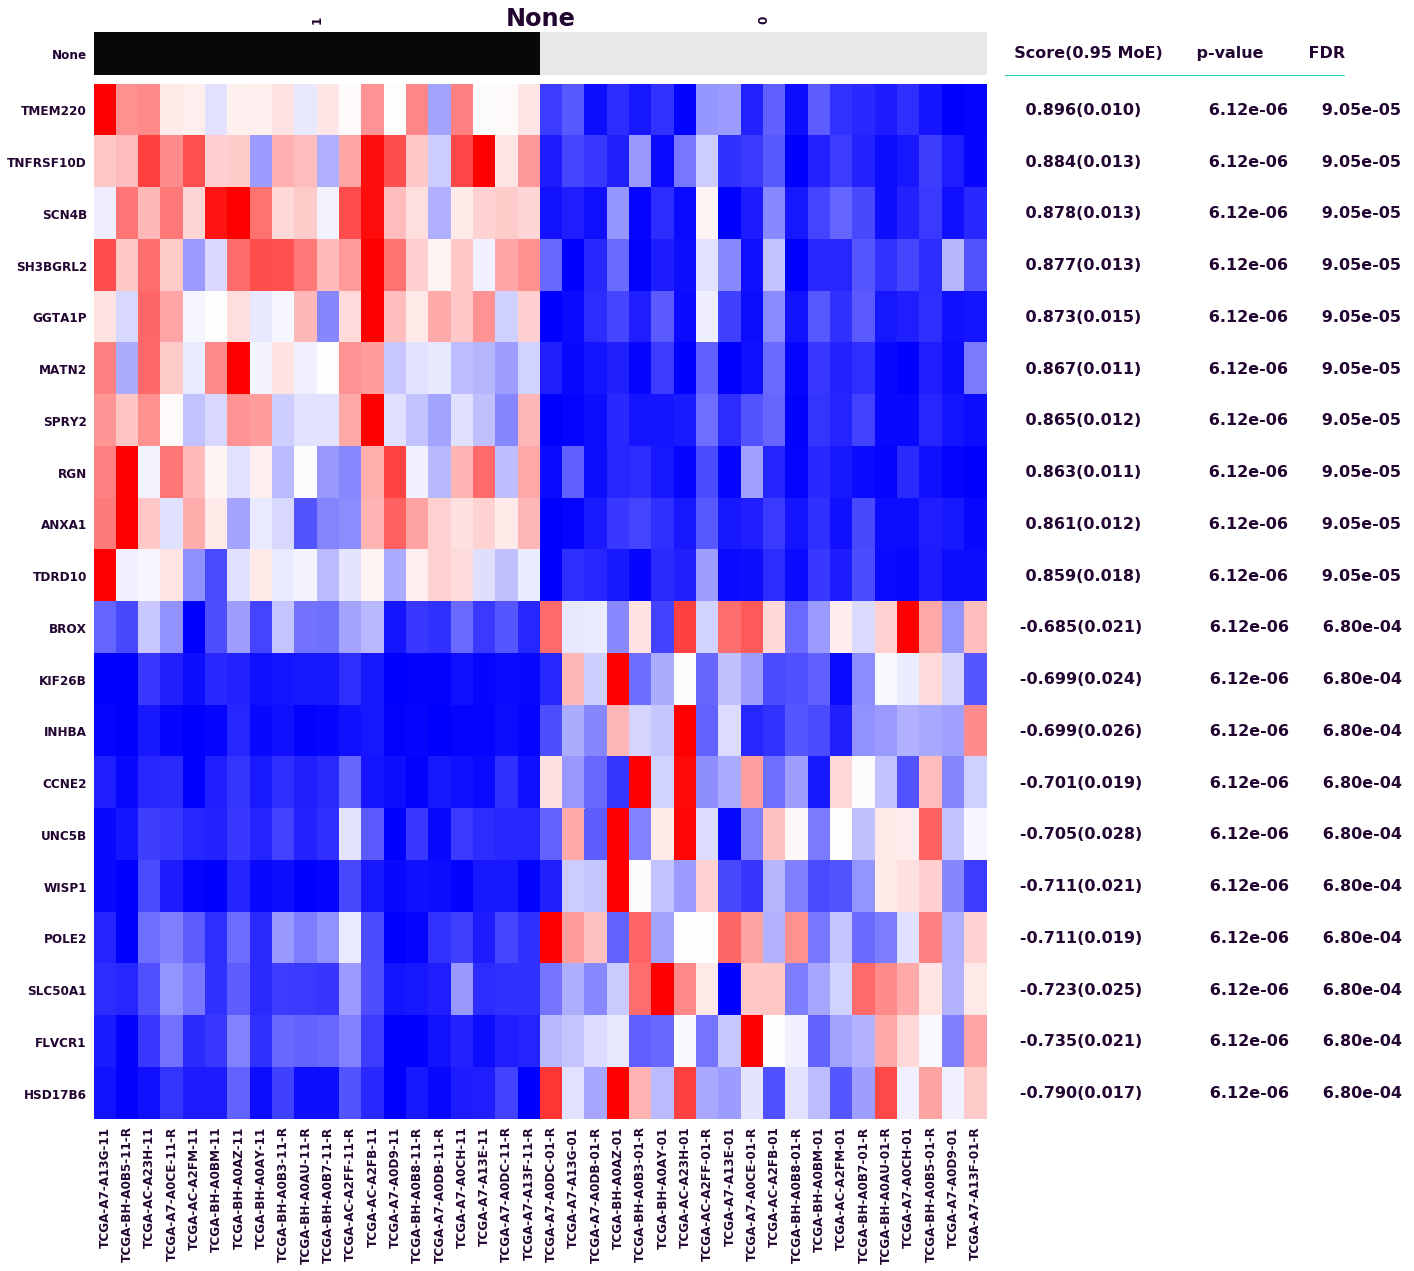

Score    0.95 MoE   p-value      FDR
Name                                               
TMEM220     0.895653  0.00963045  0.000006  0.00009
TNFRSF10D   0.884181   0.0127883  0.000006  0.00009
SCN4B       0.878124   0.0126731  0.000006  0.00009
SH3BGRL2    0.876553   0.0134106  0.000006  0.00009
GGTA1P      0.873301   0.0153976  0.000006  0.00009
MATN2       0.867221   0.0111494  0.000006  0.00009
SPRY2       0.864759   0.0123708  0.000006  0.00009
RGN         0.863130   0.0109742  0.000006  0.00009
ANXA1       0.861418   0.0121215  0.000006  0.00009
TDRD10      0.858638   0.0179224  0.000006  0.00009
GIPC2       0.854609         NaN  0.000006  0.00009
FAXDC2      0.850294         NaN  0.000006  0.00009
EGFR        0.848785         NaN  0.000006  0.00009
GNAL        0.848497         NaN  0.000006  0.00009
NTRK2       0.845624         NaN  0.000006  0.00009
KLHL21      0.845159         NaN  0.000006  0.00009
RAPGEF3     0.843627         NaN  0.000006  0.00009
TGFBR3      0.842752         NaN  0.000006  0.00009
ANKRD29     0.842425         NaN  0.000006  0.00009
LIMS2       0.842209         NaN  0.000006  0.00009
CACHD1      0.840311         NaN  0.000006  0.00009
AC022400.7  0.835892         NaN  0.000006  0.00009
USHBP1      0.835668         NaN  0.000006  0.00009
TINAGL1     0.835291         NaN  0.000006  0.00009
RGS6        0.834763         NaN  0.000006  0.00009
MOB3C       0.834312         NaN  0.000006  0.00009
DMD         0.833415         NaN  0.000006  0.00009
CYYR1       0.826385         NaN  0.000006  0.00009
AVPR2       0.825022         NaN  0.000006  0.00009
TSLP        0.824680         NaN  0.000006  0.00009
...              ...         ...       ...      ...
KNL1       -0.642033         NaN  0.000006  0.00068
CDC25C     -0.642727         NaN  0.000006  0.00068
OLR1       -0.643539         NaN  0.000006  0.00068
KDM5B      -0.644447         NaN  0.000006  0.00068
RAB26      -0.646588         NaN  0.000006  0.00068
GINS1      -0.648558         NaN  0.000006  0.00068
C3orf80    -0.648976         NaN  0.000006  0.00068
PAFAH1B3   -0.649868         NaN  0.000006  0.00068
CENPE      -0.650158         NaN  0.000006  0.00068
ATAD2      -0.650219         NaN  0.000006  0.00068
COG2       -0.655824         NaN  0.000006  0.00068
CDK1       -0.655926         NaN  0.000006  0.00068
CENPU      -0.659404         NaN  0.000006  0.00068
SLC12A8    -0.659798         NaN  0.000006  0.00068
ENTPD7     -0.661150         NaN  0.000006  0.00068
ESRP1      -0.662078         NaN  0.000006  0.00068
MBOAT2     -0.667550         NaN  0.000006  0.00068
CERS2      -0.667665         NaN  0.000006  0.00068
PCDH17     -0.672132         NaN  0.000006  0.00068
GPR160     -0.673652         NaN  0.000006  0.00068
BROX       -0.685486   0.0210223  0.000006  0.00068
KIF26B     -0.698559   0.0238111  0.000006  0.00068
INHBA      -0.699166   0.0259067  0.000006  0.00068
CCNE2      -0.700997   0.0194741  0.000006  0.00068
UNC5B      -0.705422   0.0278788  0.000006  0.00068
WISP1      -0.710602   0.0208144  0.000006  0.00068
POLE2      -0.711493   0.0192968  0.000006  0.00068
SLC50A1    -0.723363   0.0252641  0.000006  0.00068
FLVCR1     -0.735110    0.020582  0.000006  0.00068
HSD17B6    -0.789877   0.0166571  0.000006  0.00068

[16339 rows x 4 columns]

In [41]:
differential_gene_expression(gene_expression=dataset, phenotype_file="BRCA_radiation.cls", output_filename="temp", ranking_method=custom_pearson_corr, max_number_of_genes_to_show=20, number_of_permutations=10, title="None", random_seed=20121020)

## Clustering by tumor grade

count     1097
unique       5
top         t2
freq       635
Name: simplified_t_stage, dtype: object

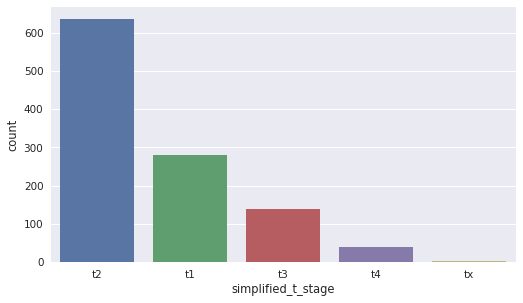

In [43]:
plt.figure(figsize=(8,4.5), dpi=75)
sns.set(style="darkgrid")
sns.countplot(x =curated_metadata.ix['simplified_t_stage'])
curated_metadata.ix['simplified_t_stage'].describe()

In [46]:
# Sort patients by tumor grade
# curated_metadata
# curated_metadata.reindex_axis(sorted(curated_metadata.columns), axis=1)

tcga-3c-aaau  \
Hybridization REF                                                      
Composite Element REF                                          value   
years_to_birth                                                    55   
vital_status                                                       0   
days_to_death                                                    NaN   
days_to_last_followup                                           4047   
tumor_tissue_site                                             breast   
pathologic_stage                                             stage x   
pathology_T_stage                                                 tx   
pathology_N_stage                                                 nx   
pathology_M_stage                                                 mx   
gender                                                        female   
date_of_initial_pathologic_diagnosis                            2004   
days_to_last_known_alive                                         NaN   
radiation_therapy                                                 no   
histological_type                     infiltrating lobular carcinoma   
number_of_lymph_nodes                                              4   
race                                                           white   
ethnicity                                     not hispanic or latino   
simplified_t_stage                                                tx   

                                                       tcga-3c-aali  \
Hybridization REF                                                     
Composite Element REF                                         value   
years_to_birth                                                   50   
vital_status                                                      0   
days_to_death                                                   NaN   
days_to_last_followup                                          4005   
tumor_tissue_site                                            breast   
pathologic_stage                                          stage iib   
pathology_T_stage                                                t2   
pathology_N_stage                                               n1a   
pathology_M_stage                                                m0   
gender                                                       female   
date_of_initial_pathologic_diagnosis                           2003   
days_to_last_known_alive                                        NaN   
radiation_therapy                                               yes   
histological_type                     infiltrating ductal carcinoma   
number_of_lymph_nodes                                             1   
race                                      black or african american   
ethnicity                                    not hispanic or latino   
simplified_t_stage                                               t2   

                                                       tcga-3c-aalj  \
Hybridization REF                                                     
Composite Element REF                                         value   
years_to_birth                                                   62   
vital_status                                                      0   
days_to_death                                                   NaN   
days_to_last_followup                                          1474   
tumor_tissue_site                                            breast   
pathologic_stage                                          stage iib   
pathology_T_stage                                                t2   
pathology_N_stage                                               n1a   
pathology_M_stage                                                m0   
gender                                                       female   
date_of_initial_pathologic_diagnosis                           2011   
days_to_last_known_alive                                 

In [47]:
# Selecting metadata for only patients in our cohort (i.e., patietns with both normal and cancer tissue)
metadata_patients = [i.upper() for i in list(curated_metadata)]
print(len(metadata_patients), len(patients), len(list(set(metadata_patients) & set(patients))))
lowercase_patients = [i.lower() for i in list(patients)]
metadata_subset = curated_metadata[lowercase_patients]
metadata_subset.rename(columns=lambda x: x.upper(), inplace=True)
metadata_subset

1097 112 112


TCGA-A7-A0CE  \
Hybridization REF                                                     
Composite Element REF                                         value   
years_to_birth                                                   57   
vital_status                                                      0   
days_to_death                                                   NaN   
days_to_last_followup                                          1074   
tumor_tissue_site                                            breast   
pathologic_stage                                          stage iia   
pathology_T_stage                                                t2   
pathology_N_stage                                           n0 (i-)   
pathology_M_stage                                                m0   
gender                                                       female   
date_of_initial_pathologic_diagnosis                           2009   
days_to_last_known_alive                                        NaN   
radiation_therapy                                               yes   
histological_type                     infiltrating ductal carcinoma   
number_of_lymph_nodes                                             0   
race                                                          white   
ethnicity                                    not hispanic or latino   
simplified_t_stage                                               t2   

                                                       TCGA-A7-A0CH  \
Hybridization REF                                                     
Composite Element REF                                         value   
years_to_birth                                                   79   
vital_status                                                      0   
days_to_death                                                   NaN   
days_to_last_followup                                          1079   
tumor_tissue_site                                            breast   
pathologic_stage                                          stage iia   
pathology_T_stage                                                t2   
pathology_N_stage                                           n0 (i-)   
pathology_M_stage                                                m0   
gender                                                       female   
date_of_initial_pathologic_diagnosis                           2009   
days_to_last_known_alive                                        NaN   
radiation_therapy                                                no   
histological_type                     infiltrating ductal carcinoma   
number_of_lymph_nodes                                             0   
race                                                          white   
ethnicity                                    not hispanic or latino   
simplified_t_stage                                               t2   

                                                       TCGA-A7-A0D9  \
Hybridization REF                                                     
Composite Element REF                                         value   
years_to_birth                                                   37   
vital_status                                                      0   
days_to_death                                                   NaN   
days_to_last_followup                                          1139   
tumor_tissue_site                                            breast   
pathologic_stage                                          stage iia   
pathology_T_stage                                                t2   
pathology_N_stage                                           n0 (i-)   
pathology_M_stage                                                m0   
gender                                                       female   
date_of_initial_pathologic_diagnosis                           2009   
days_to_last_known_alive                                        NaN   
radiat

count     112
unique      4
top        t2
freq       65
Name: simplified_t_stage, dtype: object

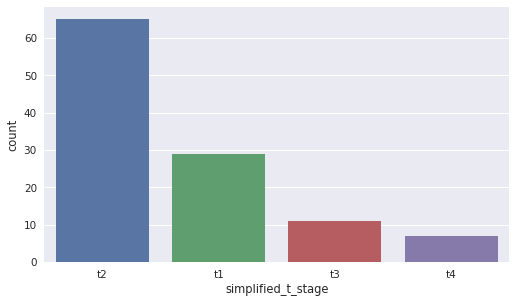

In [48]:
plt.figure(figsize=(8,4.5), dpi=75)
sns.countplot(x =metadata_subset.ix['simplified_t_stage'])
metadata_subset.ix['simplified_t_stage'].describe()

In [50]:
df = metadata_subset

t1 = df.loc[:,df.ix['simplified_t_stage']=='t1']
t2 = df.loc[:,df.ix['simplified_t_stage']=='t2']
t3 = df.loc[:,df.ix['simplified_t_stage']=='t3']
t4 = df.loc[:,df.ix['simplified_t_stage']=='t4']

# Taking the first (alphabetical) ten radiation therapy patients and the first (alphabetical) not-radiation therapy patietns:
selected_patients = list(t1)[:5]+list(t2)[:5]+list(t3)[:5]+list(t4)[:5]

new_cols = [i if i[0:12] in selected_patients else '' for i in filtered_df]
# new_cols = new_cols.remove('')
# print(new_cols)
patients_to_use = list(filter(lambda a: a != '', new_cols))

In [53]:
renamed_patients = filtered_df[patients_to_use]
# for col in list(renamed_patients):
#     if col[0:12] in list(rt):
#         print(col+'-R')
renamed_patients.rename(lambda col: col+'-t1' if col[0:12] in list(t1) else col, axis='columns', inplace=True)
renamed_patients.rename(lambda col: col+'-t2' if col[0:12] in list(t2) else col, axis='columns', inplace=True)
renamed_patients.rename(lambda col: col+'-t3' if col[0:12] in list(t3) else col, axis='columns', inplace=True)
renamed_patients.rename(lambda col: col+'-t4' if col[0:12] in list(t4) else col, axis='columns', inplace=True)
renamed_patients

TCGA-A7-A0CE-01-t2  TCGA-A7-A0CE-11-t2  TCGA-A7-A0CH-01-t2  \
Name                                                                       
TSPAN6                    8462.0              5404.0              3036.0   
TNMD                        54.0               320.0                 0.0   
DPM1                      2408.0              2472.0              1497.0   
SCYL3                     1518.0              1483.0              3030.0   
C1orf112                  2056.0               312.0               730.0   
FGR                        287.0               869.0               173.0   
CFH                       1663.0              5760.0              1531.0   
FUCA2                    10475.0              4397.0              1772.0   
GCLC                      2330.0              2775.0              3522.0   
NFYA                      2776.0              2060.0              3629.0   
STPG1                     1162.0               845.0               904.0   
NIPAL3                    5432.0              4848.0              3319.0   
LAS1L                     4739.0              3778.0              2394.0   
ENPP4                      946.0              1168.0              2695.0   
SEMA3F                    3486.0              5125.0              3911.0   
CFTR                         1.0               279.0                33.0   
ANKIB1                    7688.0              3182.0              3500.0   
CYP51A1                    336.0               227.0               250.0   
KRIT1                     3430.0              2505.0              1893.0   
RAD52                      930.0               573.0               389.0   
BAD                        863.0              2586.0              1004.0   
LAP3                      7414.0              9073.0              6335.0   
CD99                      5696.0             12627.0              7232.0   
HS3ST1                     126.0               347.0               190.0   
AOC1                        27.0                53.0                12.0   
MAD1L1                    3323.0              1909.0               936.0   
LASP1                    13231.0             18957.0             17489.0   
SNX11                     1362.0              1942.0              1290.0   
TMEM176A                  2351.0              5231.0               234.0   
M6PR                      9044.0              4161.0              4002.0   
...                          ...                 ...                 ...   
AC133065.6                  77.0               301.0                56.0   
AC022107.1                 363.0               336.0               221.0   
AC005831.1                  19.0               429.0               108.0   
AC026401.3                 461.0               423.0               307.0   
AC093908.2                  69.0                87.0               518.0   
MIR4697HG                   28.0               970.0               228.0   
AC233723.2                 107.0               387.0               178.0   
AP001528.3                  46.0               576.0                81.0   
AC000123.3                 289.0               146.0               255.0   
Z95331.1                    21.0                38.0                42.0   
AP000648.3                 402.0               203.0               184.0   
AC245369.3                 324.0               658.0                17.0   
CCDC163                    299.0               483.0               187.0   
SH3PXD2A-AS1                13.0                20.0                 4.0   
LINC01232                  144.0               173.0                96.0   
PAGR1                      669.0               418.0               394.0   
LINC00294                  783.0               724.0               303.0   
GSEC                       353.0               144.0                84.0   
FOXCUT                     195.0                 6.0                 1.0   
N4BP2L2-IT2                 10.0               153.0          

In [54]:
cusca.df2gct(renamed_patients, name='TCGA_BRCA_selected_by_grade_matched_var_filtered.gct', add_dummy_descriptions=True)

In [55]:
dataset = 'TCGA_BRCA_selected_by_grade_matched_var_filtered.gct'

In [21]:
import genepattern
import ccalnoir as ccal

from ccalnoir import differential_gene_expression
import pandas as pd
import urllib.request
from ccalnoir import compute_information_coefficient
from ccalnoir import custom_pearson_corr
RANDOM_SEED = 20121020

genepattern.GPUIBuilder(differential_gene_expression, name="Differential gene expression, discrete pheotype.", 
                        description="Sort genes according to their association with a discrete phenotype or class vector.",
                        parameters={
                                "ranking_method":{
                                                      "default": "custom_pearson_corr",
                                                      "choices":{'Pearson Correlation Matching':"custom_pearson_corr",
                                                                 'Information Correlation Matching':"compute_information_coefficient",
                                                                }
                                                     }
                        })

GPUIBuilder(description='Sort genes according to their association with a discrete phenotype or class vector.', function_import='differential_gene_expression', name='Differential gene expression, discrete pheotype.', params=[{'name': 'gene_expression', 'label': 'gene_expression', 'optional': False, 'default': '', 'description': 'GCT filename; data matrix with input gene expression profiles', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'phenotype_file', 'label': 'phenotype_file', 'optional': False, 'default': '', 'description': 'CLS filename; input binary phenotype/class distinction', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'output_filename', 'label': 'output_filename', 'optional': False, 'default': '', 'description': 'Output files will have this name plus extensions .txt and .pdf', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'ranking_method', 'label': 'ranking_method', 'optional': False, 'default': 'custom_pearson_corr', 'description': 'The function to use to compute similarity between phenotypes and gene_expression', 'hide': False, 'type': 'text', 'kinds': None, 'choices': {'Pearson Correlation Matching': 'custom_pearson_corr', 'Information Correlation Matching': 'compute_information_coefficient'}}, {'name': 'max_number_of_genes_to_show', 'label': 'max_number_of_genes_to_show', 'optional': True, 'default': 20, 'description': 'Maximum number of genes to show in the heatmap', 'hide': False, 'type': 'number', 'kinds': None, 'choices': []}, {'name': 'number_of_permutations', 'label': 'number_of_permutations', 'optional': True, 'default': 10, 'description': 'Number of random permutations to estimate statistical significance (p-values and FDRs)', 'hide': False, 'type': 'number', 'kinds': None, 'choices': []}, {'name': 'title', 'label': 'title', 'optional': True, 'default': 'None', 'description': 'The title of the heatmap', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'random_seed', 'label': 'random_seed', 'optional': True, 'default': 20121020, 'description': 'Random number generator seed (can be set to a user supplied integer for reproducibility)', 'hide': False, 'type': 'number', 'kinds': None, 'choices': []}])

Dropping 0 axis-1 slices ...
Computing match score with <function custom_pearson_corr at 0x7f998367e730> (1 process) ...
Computing MoEs with 30 samplings ...
Computing p-values and FDRs with 10 permutations ...
	1/10 ...
	2/10 ...
	3/10 ...
	4/10 ...
	5/10 ...
	6/10 ...
	7/10 ...
	8/10 ...
	9/10 ...
	10/10 ...
	10/10 - done.


No handles with labels found to put in legend.
No handles with labels found to put in legend.


-----------------------------------------------
The PDF of this heatmap can be downloaded here:



-----------------------------------------------
The TXT with the data displayed on the heatmap can be downloaded here:



-----------------------------------------------


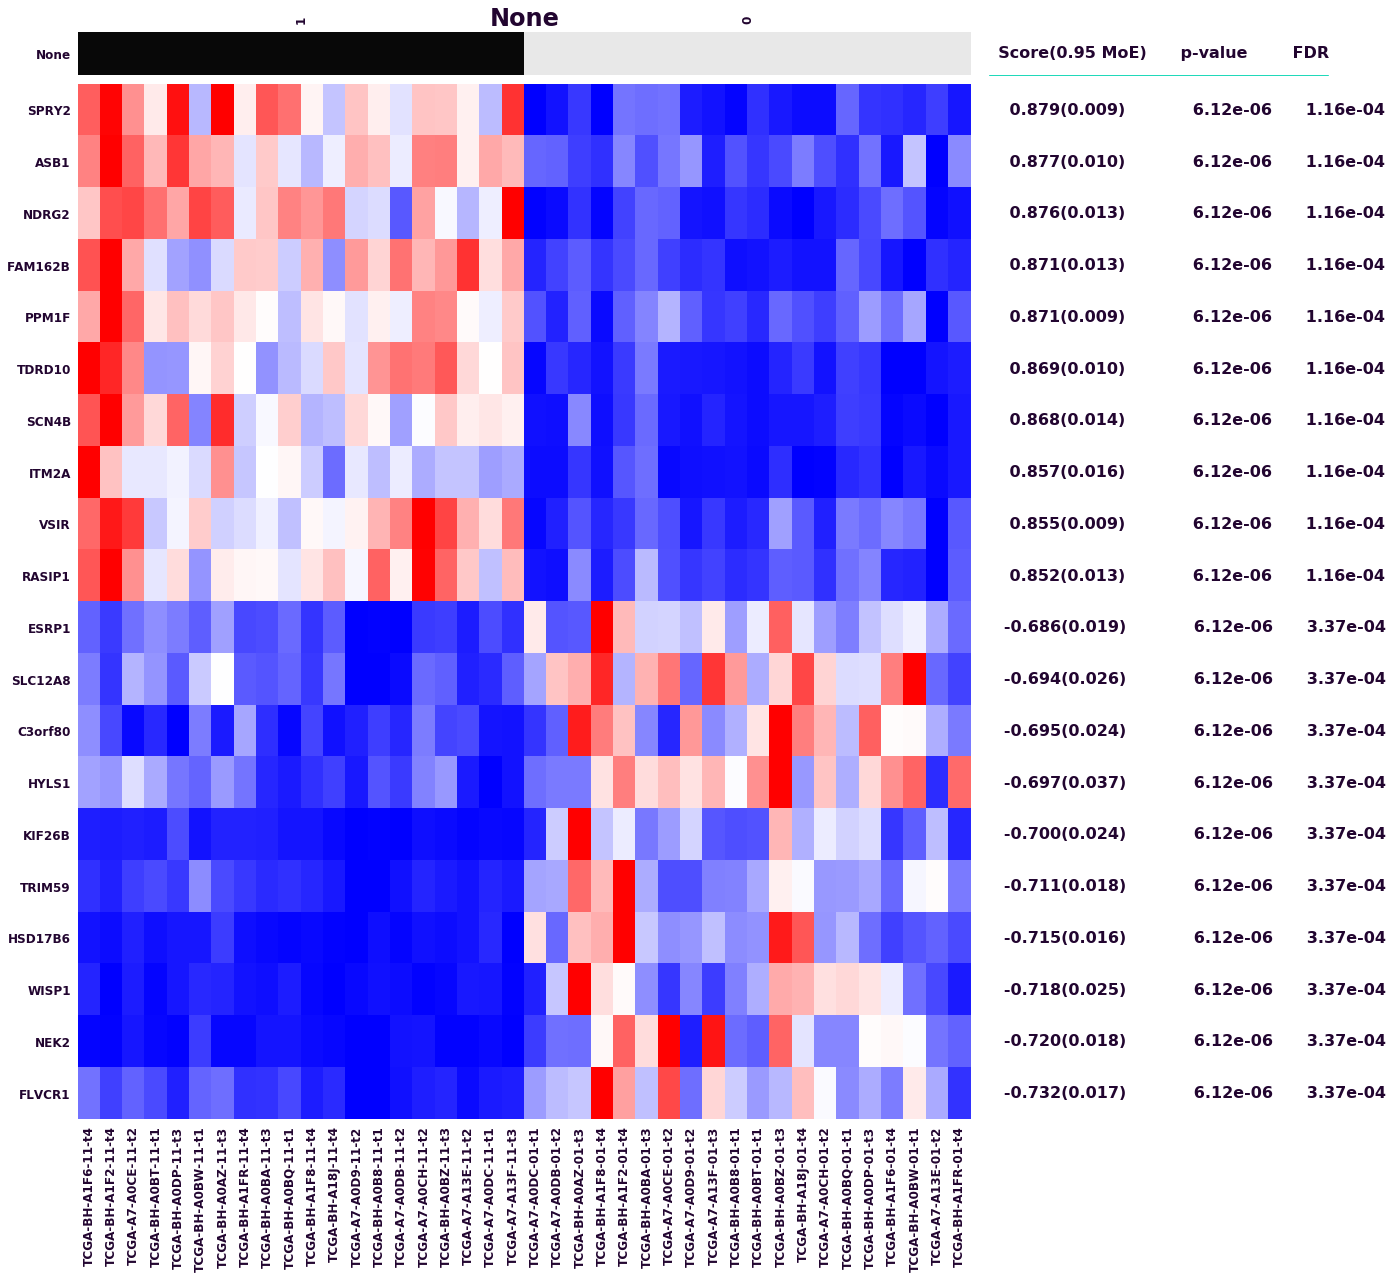

Score    0.95 MoE   p-value       FDR
Name                                                
SPRY2       0.879134  0.00926642  0.000006  0.000116
ASB1        0.876782   0.0100924  0.000006  0.000116
NDRG2       0.876217   0.0132136  0.000006  0.000116
FAM162B     0.871144   0.0130262  0.000006  0.000116
PPM1F       0.870885  0.00928573  0.000006  0.000116
TDRD10      0.869216  0.00979087  0.000006  0.000116
SCN4B       0.868080    0.013503  0.000006  0.000116
ITM2A       0.857341   0.0161212  0.000006  0.000116
VSIR        0.855447  0.00931698  0.000006  0.000116
RASIP1      0.851948   0.0130623  0.000006  0.000116
TSLP        0.851828         NaN  0.000006  0.000116
TSPAN7      0.847620         NaN  0.000006  0.000116
ITPRIPL1    0.847289         NaN  0.000006  0.000116
GNAL        0.846971         NaN  0.000006  0.000116
CACHD1      0.843162         NaN  0.000006  0.000116
AQP1        0.842996         NaN  0.000006  0.000116
METTL7A     0.840030         NaN  0.000006  0.000116
LHFP        0.839849         NaN  0.000006  0.000116
LIMS2       0.839063         NaN  0.000006  0.000116
ANXA1       0.837061         NaN  0.000006  0.000116
GIPC2       0.835482         NaN  0.000006  0.000116
ANKRD29     0.834286         NaN  0.000006  0.000116
TMEM220     0.833680         NaN  0.000006  0.000116
POU6F1      0.833317         NaN  0.000006  0.000116
MATN2       0.831248         NaN  0.000006  0.000116
BOC         0.830289         NaN  0.000006  0.000116
TINAGL1     0.830186         NaN  0.000006  0.000116
TMEM246     0.829794         NaN  0.000006  0.000116
ADAM33      0.828894         NaN  0.000006  0.000116
PGM5        0.828822         NaN  0.000006  0.000116
...              ...         ...       ...       ...
CLEC5A     -0.648463         NaN  0.000006  0.000337
POLR3K     -0.648777         NaN  0.000006  0.000337
SMC4       -0.653609         NaN  0.000006  0.000337
AC239868.2 -0.653815         NaN  0.000006  0.000337
UBE2T      -0.655531         NaN  0.000006  0.000337
CDKN3      -0.656703         NaN  0.000006  0.000337
ESM1       -0.657732         NaN  0.000006  0.000337
POLE2      -0.658832         NaN  0.000006  0.000337
XRCC2      -0.659911         NaN  0.000006  0.000337
ANLN       -0.660452         NaN  0.000006  0.000337
BICDL1     -0.661903         NaN  0.000006  0.000337
TUFT1      -0.663695         NaN  0.000006  0.000337
AP1M2      -0.666362         NaN  0.000006  0.000337
NEIL3      -0.667033         NaN  0.000006  0.000337
HMMR       -0.669397         NaN  0.000006  0.000337
CBX3       -0.669618         NaN  0.000006  0.000337
CTHRC1     -0.669708         NaN  0.000006  0.000337
PCDH17     -0.675915         NaN  0.000006  0.000337
PMM2       -0.677461         NaN  0.000006  0.000337
KIF24      -0.677749         NaN  0.000006  0.000337
ESRP1      -0.685510   0.0194556  0.000006  0.000337
SLC12A8    -0.694026   0.0257421  0.000006  0.000337
C3orf80    -0.695288   0.0242011  0.000006  0.000337
HYLS1      -0.697475   0.0366183  0.000006  0.000337
KIF26B     -0.700296   0.0244683  0.000006  0.000337
TRIM59     -0.711299   0.0184549  0.000006  0.000337
HSD17B6    -0.714919   0.0158034  0.000006  0.000337
WISP1      -0.717783   0.0252304  0.000006  0.000337
NEK2       -0.720465    0.018339  0.000006  0.000337
FLVCR1     -0.731933   0.0171484  0.000006  0.000337

[16339 rows x 4 columns]

In [57]:
differential_gene_expression(gene_expression=dataset, phenotype_file="BRCA_radiation.cls", output_filename="grade", ranking_method=custom_pearson_corr, max_number_of_genes_to_show=20, number_of_permutations=10, title="None", random_seed=20121020)

In [22]:
import genepattern
# import cuzcatlan as cusca
# import pandas as pd    
from cuzcatlan import hc_samples

genepattern.GPUIBuilder(hc_samples, name="Hierarchical Clustering of Samples (Columns).", 
                        description="This function performs hierarchical clustering to group samples (columns) with similar phenotypes..",
                        parameters={
                                "distance_metric":{
                                                      "default": "pearson",
                                                      "choices":{'Information Coefficient':"information_coefficient",
                                                                 'City Block (Manhattan or L1-norm)':'manhattan',
                                                                 'Euclidean (L2-norm)':"euclidean",
                                                                 'Pearson Correlation':"pearson",
                                                                 'Uncentered Pearson Correlation':'uncentered_pearson',
                                                                 'Uncentered Pearson Correlation, absolute value':'absolute_uncentered_pearson',
                                                                 'Spearman Correlation':'spearman',
                                                                 "Kendall's Tau": 'kendall',
                                                                 'Cosine distance':'cosine',
                                                                }
                                                     }
                        })

GPUIBuilder(description='This function performs hierarchical clustering to group samples (columns) with similar phenotypes..', function_import='hc_samples', name='Hierarchical Clustering of Samples (Columns).', params=[{'name': 'input_gene_expression', 'label': 'input_gene_expression', 'optional': False, 'default': '', 'description': 'gene expression data filename (.gct file) where rows are genes and columns are samples', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'clustering_type', 'label': 'clustering_type', 'optional': False, 'default': '', 'description': 'single or consensus -- Only single is suported at the moment', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'distance_metric', 'label': 'distance_metric', 'optional': False, 'default': 'pearson', 'description': 'the function to be used when comparing the distance/similarity of the columns in the input_gene_expression dataset', 'hide': False, 'type': 'text', 'kinds': None, 'choices': {'Information Coefficient': 'information_coefficient', 'City Block (Manhattan or L1-norm)': 'manhattan', 'Euclidean (L2-norm)': 'euclidean', 'Pearson Correlation': 'pearson', 'Uncentered Pearson Correlation': 'uncentered_pearson', 'Uncentered Pearson Correlation, absolute value': 'absolute_uncentered_pearson', 'Spearman Correlation': 'spearman', "Kendall's Tau": 'kendall', 'Cosine distance': 'cosine'}}, {'name': 'file_basename', 'label': 'file_basename', 'optional': True, 'default': 'HC_out', 'description': 'the name to use when naming output files', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'clusters_to_highlight', 'label': 'clusters_to_highlight', 'optional': True, 'default': 'None', 'description': 'how many clusters to highlight in the dendrogram', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}])

Currenty clustering_type is being ignored, only 'single' is supported.
Now we will start performing hierarchical clustering, this may take a little while.
----------------------------------------------------------------------
The PDF of this heatmap can be downloaded here:


----------------------------------------------------------------------
The CDF which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------
The ATR which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

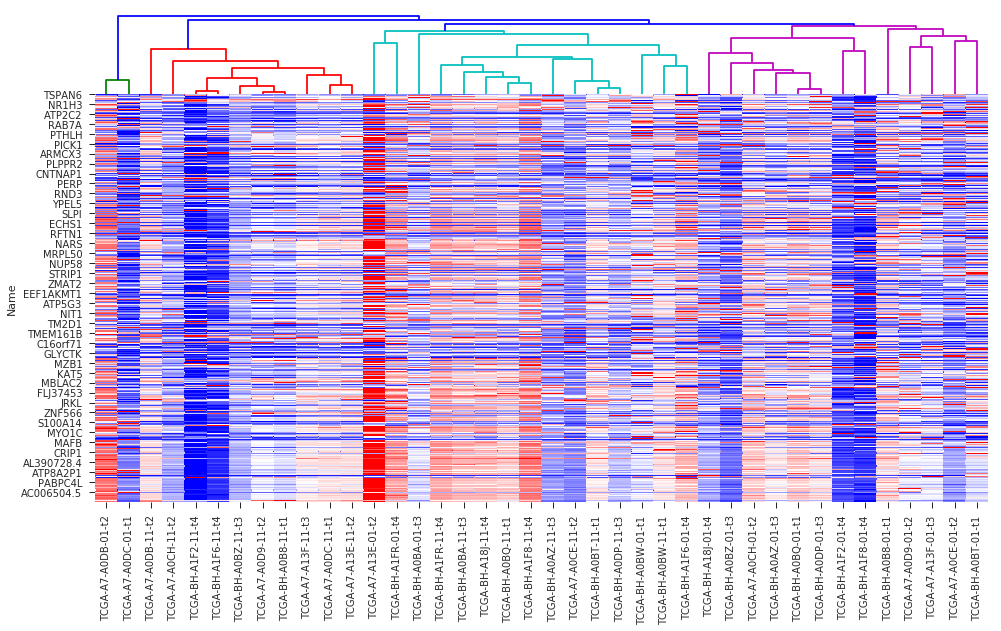

Done with Hierarchical Clustering!


AgglomerativeClustering(affinity=<function my_affinity_p at 0x7f99c18e7268>,
            compute_full_tree='auto', connectivity=None, linkage='average',
            memory=None, n_clusters=2,
            pooling_func=<function mean at 0x7f99f806d598>)

In [59]:
hc_samples(input_gene_expression=dataset, clustering_type="simple", distance_metric="pearson", file_basename="HC_out", clusters_to_highlight=4)

## Clustering by tumor grade cancer only

count     1097
unique       5
top         t2
freq       635
Name: simplified_t_stage, dtype: object

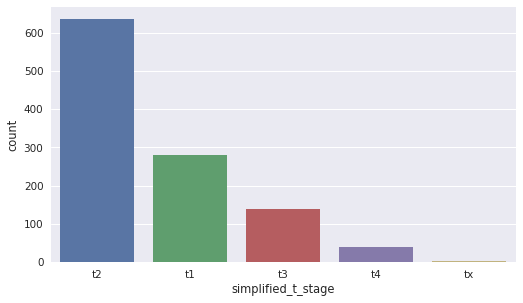

In [60]:
plt.figure(figsize=(8,4.5), dpi=75)
sns.set(style="darkgrid")
sns.countplot(x =curated_metadata.ix['simplified_t_stage'])
curated_metadata.ix['simplified_t_stage'].describe()

In [61]:
# Selecting metadata for only patients in our cohort (i.e., patietns with both normal and cancer tissue)
metadata_patients = [i.upper() for i in list(curated_metadata)]
print(len(metadata_patients), len(patients), len(list(set(metadata_patients) & set(patients))))
lowercase_patients = [i.lower() for i in list(patients)]
metadata_subset = curated_metadata[lowercase_patients]
metadata_subset.rename(columns=lambda x: x.upper(), inplace=True)
metadata_subset

1097 112 112


TCGA-A7-A0CE  \
Hybridization REF                                                     
Composite Element REF                                         value   
years_to_birth                                                   57   
vital_status                                                      0   
days_to_death                                                   NaN   
days_to_last_followup                                          1074   
tumor_tissue_site                                            breast   
pathologic_stage                                          stage iia   
pathology_T_stage                                                t2   
pathology_N_stage                                           n0 (i-)   
pathology_M_stage                                                m0   
gender                                                       female   
date_of_initial_pathologic_diagnosis                           2009   
days_to_last_known_alive                                        NaN   
radiation_therapy                                               yes   
histological_type                     infiltrating ductal carcinoma   
number_of_lymph_nodes                                             0   
race                                                          white   
ethnicity                                    not hispanic or latino   
simplified_t_stage                                               t2   

                                                       TCGA-A7-A0CH  \
Hybridization REF                                                     
Composite Element REF                                         value   
years_to_birth                                                   79   
vital_status                                                      0   
days_to_death                                                   NaN   
days_to_last_followup                                          1079   
tumor_tissue_site                                            breast   
pathologic_stage                                          stage iia   
pathology_T_stage                                                t2   
pathology_N_stage                                           n0 (i-)   
pathology_M_stage                                                m0   
gender                                                       female   
date_of_initial_pathologic_diagnosis                           2009   
days_to_last_known_alive                                        NaN   
radiation_therapy                                                no   
histological_type                     infiltrating ductal carcinoma   
number_of_lymph_nodes                                             0   
race                                                          white   
ethnicity                                    not hispanic or latino   
simplified_t_stage                                               t2   

                                                       TCGA-A7-A0D9  \
Hybridization REF                                                     
Composite Element REF                                         value   
years_to_birth                                                   37   
vital_status                                                      0   
days_to_death                                                   NaN   
days_to_last_followup                                          1139   
tumor_tissue_site                                            breast   
pathologic_stage                                          stage iia   
pathology_T_stage                                                t2   
pathology_N_stage                                           n0 (i-)   
pathology_M_stage                                                m0   
gender                                                       female   
date_of_initial_pathologic_diagnosis                           2009   
days_to_last_known_alive                                        NaN   
radiat

count     112
unique      4
top        t2
freq       65
Name: simplified_t_stage, dtype: object

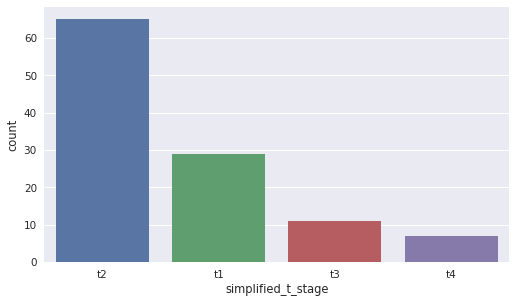

In [62]:
plt.figure(figsize=(8,4.5), dpi=75)
sns.countplot(x =metadata_subset.ix['simplified_t_stage'])
metadata_subset.ix['simplified_t_stage'].describe()

In [101]:
df = metadata_subset

t1 = df.loc[:,df.ix['simplified_t_stage']=='t1']
t2 = df.loc[:,df.ix['simplified_t_stage']=='t2']
t3 = df.loc[:,df.ix['simplified_t_stage']=='t3']
t4 = df.loc[:,df.ix['simplified_t_stage']=='t4']

# Taking the first (alphabetical) ten radiation therapy patients and the first (alphabetical) not-radiation therapy patietns:
# how_many = 10
# selected_patients = list(t1)[:how_many]+list(t2)[:how_many]+list(t3)[:how_many]+list(t4)[:how_many]
selected_patients = list(t1)+list(t4)

new_cols = [i if (i[0:12] in selected_patients and i[13:]=='01' ) else '' for i in filtered_df]
# new_cols = new_cols.remove('')
# print(new_cols)
patients_to_use = list(filter(lambda a: a != '', new_cols))
len(patients_to_use)

36

In [102]:
renamed_patients = filtered_df[patients_to_use]
# for col in list(renamed_patients):
#     if col[0:12] in list(rt):
#         print(col+'-R')
renamed_patients.rename(lambda col: col+'-t1' if col[0:12] in list(t1) else col, axis='columns', inplace=True)
renamed_patients.rename(lambda col: col+'-t2' if col[0:12] in list(t2) else col, axis='columns', inplace=True)
renamed_patients.rename(lambda col: col+'-t3' if col[0:12] in list(t3) else col, axis='columns', inplace=True)
renamed_patients.rename(lambda col: col+'-t4' if col[0:12] in list(t4) else col, axis='columns', inplace=True)
renamed_patients

TCGA-A7-A0DC-01-t1  TCGA-BH-A0B8-01-t1  TCGA-BH-A0BQ-01-t1  \
Name                                                                       
TSPAN6                    4094.0              2390.0              3637.0   
TNMD                        14.0                38.0                 7.0   
DPM1                      3050.0              1391.0              1222.0   
SCYL3                     1906.0              1274.0              1801.0   
C1orf112                   846.0               462.0               577.0   
FGR                        102.0               142.0               361.0   
CFH                        772.0              1381.0              3868.0   
FUCA2                     2124.0              2573.0              2269.0   
GCLC                      9453.0              1962.0              1299.0   
NFYA                      3308.0              3485.0              2105.0   
STPG1                      277.0               398.0               687.0   
NIPAL3                    4931.0              2584.0              1580.0   
LAS1L                     2509.0              2713.0              2469.0   
ENPP4                     3074.0               575.0               632.0   
SEMA3F                    3401.0              5689.0              4865.0   
CFTR                        17.0                 7.0                 1.0   
ANKIB1                    9206.0              2632.0              2397.0   
CYP51A1                    882.0               290.0               214.0   
KRIT1                     3320.0              1274.0              1193.0   
RAD52                      742.0               389.0               270.0   
BAD                        374.0              1947.0              1804.0   
LAP3                      5420.0              3546.0              8310.0   
CD99                      1572.0              4978.0             12316.0   
HS3ST1                      34.0               114.0                93.0   
AOC1                         9.0                19.0                36.0   
MAD1L1                    1015.0              1487.0              1261.0   
LASP1                    15047.0             24078.0             18369.0   
SNX11                     1240.0              1825.0              1100.0   
TMEM176A                    50.0               362.0              2085.0   
M6PR                      6640.0              4461.0              3568.0   
...                          ...                 ...                 ...   
AC133065.6                  54.0                53.0                87.0   
AC022107.1                 501.0               246.0               169.0   
AC005831.1                 260.0               642.0               255.0   
AC026401.3                  86.0               162.0               334.0   
AC093908.2                 235.0                78.0               119.0   
MIR4697HG                   80.0               405.0               110.0   
AC233723.2                 336.0               335.0                89.0   
AP001528.3                 238.0               111.0                93.0   
AC000123.3                 775.0               362.0               101.0   
Z95331.1                   314.0                43.0                 7.0   
AP000648.3                 619.0                70.0                95.0   
AC245369.3                   1.0                56.0               295.0   
CCDC163                    178.0               261.0               191.0   
SH3PXD2A-AS1                58.0                35.0                 5.0   
LINC01232                   58.0                43.0                93.0   
PAGR1                      773.0               803.0               463.0   
LINC00294                  421.0               385.0               244.0   
GSEC                        63.0               119.0               138.0   
FOXCUT                       0.0                 1.0                 1.0   
N4BP2L2-IT2                713.0                37.0          

In [115]:
cusca.df2gct(renamed_patients, name='TCGA_BRCA_selected_by_grade_TUMOR_var_filtered.gct', add_dummy_descriptions=True)

In [152]:
temp = renamed_patients.drop('TCGA-A7-A0DC-01-t1', axis=1) # This seems to be an outlier
temp.drop('TCGA-E2-A1LS-01-t1', axis=1, inplace=True) # This seems to be an outlie
# Filtering again
std = temp.std(axis=1)
min_std = 3035
# mean = df.mean(axis=1)
new_std = std[std > min_std]
print("{} genes were filtered out -- they had a Standard Deviation lower than {} (mean std was ~{}, median std was ~{})".format(std.count() - new_std.count(), min_std, int(std.mean()), int(std.median()) ))
print("New gene lengths is {}".format(new_std.count()))
twice_filtered_df = temp.ix[new_std.index]
# twice_filtered_df.insert(loc=0,column='Description', value = Description.ix[new_std.index])
twice_filtered_df

13371 genes were filtered out -- they had a Standard Deviation lower than 3035 (mean std was ~2686, median std was ~964)
New gene lengths is 2968


Description  TCGA-BH-A0B8-01-t1  TCGA-BH-A0BQ-01-t1  \
Name                                                             
FUCA2            FUCA2              2573.0              2269.0   
ANKIB1          ANKIB1              2632.0              2397.0   
LAP3              LAP3              3546.0              8310.0   
CD99              CD99              4978.0             12316.0   
AOC1              AOC1                19.0                36.0   
LASP1            LASP1             24078.0             18369.0   
CFLAR            CFLAR              2022.0              4389.0   
SLC7A2          SLC7A2              2101.0             29742.0   
ARF5              ARF5              5814.0              6459.0   
PLXND1          PLXND1              6413.0              7480.0   
AK2                AK2              4086.0              5301.0   
FKBP4            FKBP4             21403.0              9012.0   
KDM1A            KDM1A              3996.0              5384.0   
PDK4              PDK4               661.0              5682.0   
CDC27            CDC27              4423.0              2945.0   
UPF1              UPF1              6187.0              5966.0   
SLC25A5        SLC25A5             20553.0             10201.0   
PRKAR2B        PRKAR2B              6269.0              1130.0   
CREBBP          CREBBP              9120.0              6662.0   
KMT2E            KMT2E              4426.0              3196.0   
IBTK              IBTK              3442.0              2730.0   
MYCBP2          MYCBP2              3867.0              2801.0   
ZFX                ZFX             13048.0              2041.0   
LAMP2            LAMP2             11274.0              7260.0   
GDE1              GDE1              4759.0              6601.0   
AP2B1            AP2B1             38883.0             21237.0   
CX3CL1          CX3CL1               572.0              4753.0   
SCIN              SCIN               177.0               196.0   
ARSD              ARSD              9167.0              7849.0   
ADIPOR2        ADIPOR2             41577.0              9261.0   
...                ...                 ...                 ...   
CYP2B7P        CYP2B7P              8836.0              1900.0   
SLC5A8          SLC5A8                 5.0              1764.0   
KIAA1147      KIAA1147              2366.0              1881.0   
LSM14A          LSM14A              6740.0              6376.0   
NORAD            NORAD             28280.0             19138.0   
EPPK1            EPPK1               594.0              2063.0   
PECAM1          PECAM1              5395.0              9320.0   
SPON1            SPON1              1883.0              6235.0   
MSMB              MSMB                31.0                34.0   
DYNLL2          DYNLL2             13040.0              5152.0   
RBM8A            RBM8A              4763.0              5868.0   
TXNIP            TXNIP             15998.0             45699.0   
NCOA4            NCOA4             22044.0              9982.0   
SCGB1B2P      SCGB1B2P                 0.0                14.0   
IGHV3-30      IGHV3-30                87.0               720.0   
TAF15            TAF15              9230.0              5842.0   
CCL5              CCL5               635.0              2536.0   
CD24              CD24             43232.0             15534.0   
CYFIP1          CYFIP1              5050.0              9499.0   
MLLT6            MLLT6              5839.0              7232.0   
PPP4R3B        PPP4R3B              6229.0              4839.0   
FCGBP            FCGBP               410.0               960.0   
PIP4K2B        PIP4K2B              6432.0              4405.0   
DACH1            DACH1              2382.0              1717.0   
MARCKS          MARCKS              2619.0              8068.0   
PSMB3            PSMB3              3968.0              3970.0   
IGLV2-8        IGLV2-8                38.0               518.0   
ACACA            ACACA             10523.0         

In [153]:
cusca.df2gct(twice_filtered_df, name='TCGA_BRCA_selected_by_grade_TUMOR_twice_filtered.gct', add_dummy_descriptions=False)
dataset = 'TCGA_BRCA_selected_by_grade_TUMOR_twice_filtered.gct'

heatmap.pdf has been created!
The PDF of this heatmap can be downloaded here:


<Figure size 432x288 with 0 Axes>

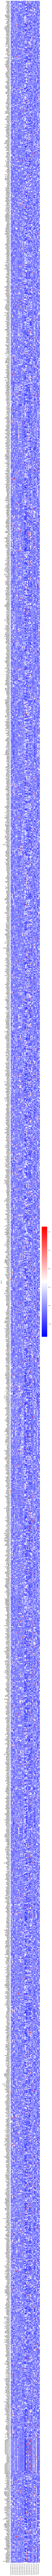

In [154]:
cusca.display_heatmap(dataset, row_centering='Mean',row_normalization=True, col_centering='Mean',col_normalization=False)

Currenty clustering_type is being ignored, only 'single' is supported.
Now we will start performing hierarchical clustering, this may take a little while.
----------------------------------------------------------------------
The PDF of this heatmap can be downloaded here:


----------------------------------------------------------------------
The CDF which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------
The ATR which is compatible with HierarchicalClusteringViewer is here:


----------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

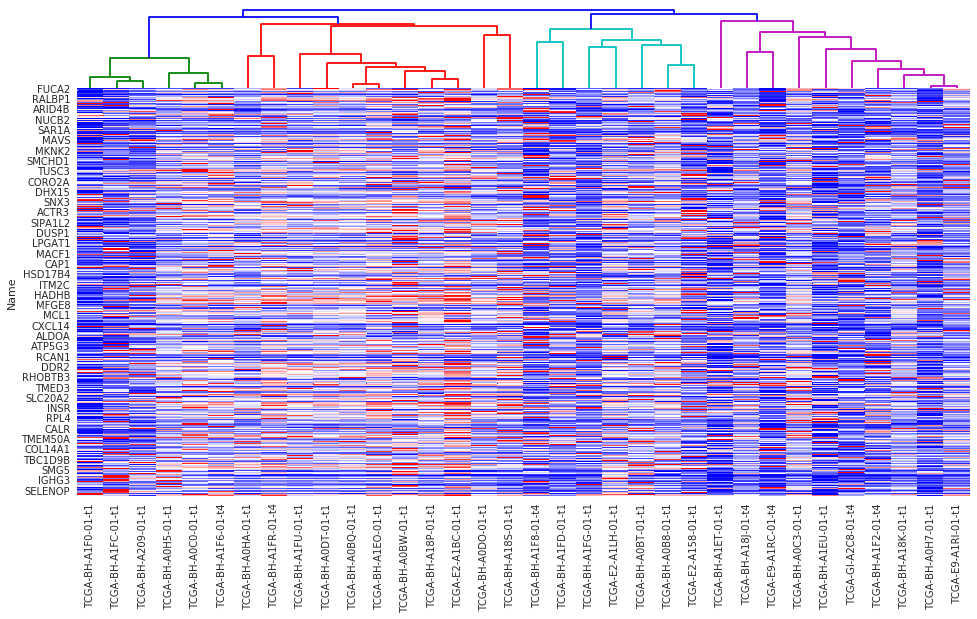

Done with Hierarchical Clustering!


AgglomerativeClustering(affinity=<function my_affinity_p at 0x7f99c18e7268>,
            compute_full_tree='auto', connectivity=None, linkage='average',
            memory=None, n_clusters=2,
            pooling_func=<function mean at 0x7f99f806d598>)

In [155]:
hc_samples(input_gene_expression=dataset, clustering_type="single", distance_metric="pearson", file_basename="HC_out", clusters_to_highlight=4)

# doing stuff

## Old stuff

In [1]:
# Requires GenePattern Notebook: pip install genepattern-notebook
import gp
import genepattern

# Username and password removed for security reasons.
genepattern.GPAuthWidget(genepattern.register_session("https://gp-beta-ami.genepattern.org/gp", "", ""))

GPAuthWidget()

In [2]:
renamefile_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00338')
renamefile_job_spec = renamefile_task.make_job_spec()
renamefile_job_spec.set_parameter("input.file", "https://datasets.genepattern.org/data/TCGA_BRCA_temp/TCGA_BRCA_all_matched_samples.gct")
renamefile_job_spec.set_parameter("output.filename", "BRCA.gct")
renamefile_job_spec.set_parameter("screen.filename", "no")
renamefile_job_spec.set_parameter("force.copy", "no")
genepattern.GPTaskWidget(renamefile_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00338')

In [3]:
job20823 = gp.GPJob(genepattern.get_session(0), 20823)
genepattern.GPJobWidget(job20823)

GPJobWidget(job_number=20823)

In [4]:
hierarchicalclustering_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00009')
hierarchicalclustering_job_spec = hierarchicalclustering_task.make_job_spec()
genepattern.GPTaskWidget(hierarchicalclustering_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00009')

# Below is older work.

## Preprocess Dataset 

In [5]:
preprocessdataset_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00020')
preprocessdataset_job_spec = preprocessdataset_task.make_job_spec()
preprocessdataset_job_spec.set_parameter("input.filename", "https://gp-beta-ami.genepattern.org/gp/jobResults/18035/BRCA.gct")
preprocessdataset_job_spec.set_parameter("threshold.and.filter", "1")
preprocessdataset_job_spec.set_parameter("floor", "20")
preprocessdataset_job_spec.set_parameter("ceiling", "2000000")
preprocessdataset_job_spec.set_parameter("min.fold.change", "3")
preprocessdataset_job_spec.set_parameter("min.delta", "100")
preprocessdataset_job_spec.set_parameter("num.outliers.to.exclude", "0")
preprocessdataset_job_spec.set_parameter("row.normalization", "0")
preprocessdataset_job_spec.set_parameter("row.sampling.rate", "1")
preprocessdataset_job_spec.set_parameter("threshold.for.removing.rows", "")
preprocessdataset_job_spec.set_parameter("number.of.columns.above.threshold", "")
preprocessdataset_job_spec.set_parameter("log2.transform", "0")
preprocessdataset_job_spec.set_parameter("output.file.format", "3")
preprocessdataset_job_spec.set_parameter("output.file", "<input.filename_basename>.preprocessed")
genepattern.GPTaskWidget(preprocessdataset_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00020')

In [6]:
job18036 = gp.GPJob(genepattern.get_session(0), 18036)
genepattern.GPJobWidget(job18036)

GPJobWidget(job_number=18036)

In [7]:
hierarchicalclustering_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00009')
hierarchicalclustering_job_spec = hierarchicalclustering_task.make_job_spec()
hierarchicalclustering_job_spec.set_parameter("input.filename", "https://datasets.genepattern.org/data/TCGA_BRCA_temp/TCGA_BRCA_all_matched_samples.gct")
hierarchicalclustering_job_spec.set_parameter("column.distance.measure", "2")
hierarchicalclustering_job_spec.set_parameter("output_distance_matrix", "False")
hierarchicalclustering_job_spec.set_parameter("row.distance.measure", "0")
hierarchicalclustering_job_spec.set_parameter("clustering.method", "a")
hierarchicalclustering_job_spec.set_parameter("output.base.name", "<input.filename_basename>")
hierarchicalclustering_job_spec.set_parameter("row.centering", "Mean")
hierarchicalclustering_job_spec.set_parameter("row.normalize", "False")
hierarchicalclustering_job_spec.set_parameter("col.centering", "Mean")
hierarchicalclustering_job_spec.set_parameter("col.normalize", "False")
genepattern.GPTaskWidget(hierarchicalclustering_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00009')

In [8]:
job18044 = gp.GPJob(genepattern.get_session(0), 18044)
genepattern.GPJobWidget(job18044)

GPJobWidget(job_number=18044)

In [9]:
hierarchicalclusteringviewer_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00031')
hierarchicalclusteringviewer_job_spec = hierarchicalclusteringviewer_task.make_job_spec()
hierarchicalclusteringviewer_job_spec.set_parameter("cdt.file", "https://gp-beta-ami.genepattern.org/gp/jobResults/18044/TCGA_BRCA_all_matched_samples.cdt")
hierarchicalclusteringviewer_job_spec.set_parameter("gtr.file", "")
hierarchicalclusteringviewer_job_spec.set_parameter("atr.file", "https://gp-beta-ami.genepattern.org/gp/jobResults/18044/TCGA_BRCA_all_matched_samples.atr")
genepattern.GPTaskWidget(hierarchicalclusteringviewer_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00031')

In [10]:
job18348 = gp.GPJob(genepattern.get_session(0), 18348)
genepattern.GPJobWidget(job18348)

GPJobWidget(job_number=18348)

In [11]:
hierarchicalclustering_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00009')
hierarchicalclustering_job_spec = hierarchicalclustering_task.make_job_spec()
hierarchicalclustering_job_spec.set_parameter("input.filename", "https://gp-beta-ami.genepattern.org/gp/jobResults/18036/BRCA.preprocessed.gct")
hierarchicalclustering_job_spec.set_parameter("column.distance.measure", "2")
hierarchicalclustering_job_spec.set_parameter("output_distance_matrix", "False")
hierarchicalclustering_job_spec.set_parameter("row.distance.measure", "0")
hierarchicalclustering_job_spec.set_parameter("clustering.method", "a")
hierarchicalclustering_job_spec.set_parameter("output.base.name", "<input.filename_basename>")
hierarchicalclustering_job_spec.set_parameter("row.centering", "Mean")
hierarchicalclustering_job_spec.set_parameter("row.normalize", "True")
hierarchicalclustering_job_spec.set_parameter("col.centering", "Mean")
hierarchicalclustering_job_spec.set_parameter("col.normalize", "True")
genepattern.GPTaskWidget(hierarchicalclustering_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00009')

In [12]:
job18043 = gp.GPJob(genepattern.get_session(0), 18043)
genepattern.GPJobWidget(job18043)

GPJobWidget(job_number=18043)

In [13]:
hierarchicalclusteringviewer_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00031')
hierarchicalclusteringviewer_job_spec = hierarchicalclusteringviewer_task.make_job_spec()
hierarchicalclusteringviewer_job_spec.set_parameter("cdt.file", "https://gp-beta-ami.genepattern.org/gp/jobResults/18043/BRCA.preprocessed.cdt")
hierarchicalclusteringviewer_job_spec.set_parameter("gtr.file", "")
hierarchicalclusteringviewer_job_spec.set_parameter("atr.file", "https://gp-beta-ami.genepattern.org/gp/jobResults/18043/BRCA.preprocessed.atr")
genepattern.GPTaskWidget(hierarchicalclusteringviewer_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.visualizer:00031')

In [14]:
job18046 = gp.GPJob(genepattern.get_session(0), 18046)
genepattern.GPJobWidget(job18046)

GPJobWidget(job_number=18046)

In [23]:
import genepattern
# import cuzcatlan as cusca
# import pandas as pd    
from cuzcatlan import hc_samples

genepattern.GPUIBuilder(hc_samples, name="Hierarchical Clustering of Samples (Columns).", 
                        description="This function performs hierarchical clustering to group samples (columns) with similar phenotypes..",
                        parameters={
                                "distance_metric":{
                                                      "default": "pearson",
                                                      "choices":{'Information Coefficient':"information_coefficient",
                                                                 'City Block (Manhattan or L1-norm)':'manhattan',
                                                                 'Euclidean (L2-norm)':"euclidean",
                                                                 'Pearson Correlation':"pearson",
                                                                 'Uncentered Pearson Correlation':'uncentered_pearson',
                                                                 'Uncentered Pearson Correlation, absolute value':'absolute_uncentered_pearson',
                                                                 'Spearman Correlation':'spearman',
                                                                 "Kendall's Tau": 'kendall',
                                                                 'Cosine distance':'cosine',
                                                                }
                                                     },
                            "input_gene_expression":{
                                "type": "file",
                                "kinds":["gct"]}
                        })

GPUIBuilder(description='This function performs hierarchical clustering to group samples (columns) with similar phenotypes..', function_import='hc_samples', name='Hierarchical Clustering of Samples (Columns).', params=[{'name': 'input_gene_expression', 'label': 'input_gene_expression', 'optional': False, 'default': '', 'description': 'gene expression data filename (.gct file) where rows are genes and columns are samples', 'hide': False, 'type': 'file', 'kinds': ['gct'], 'choices': []}, {'name': 'clustering_type', 'label': 'clustering_type', 'optional': False, 'default': '', 'description': 'single or consensus -- Only single is suported at the moment', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'distance_metric', 'label': 'distance_metric', 'optional': False, 'default': 'pearson', 'description': 'the function to be used when comparing the distance/similarity of the columns in the input_gene_expression dataset', 'hide': False, 'type': 'text', 'kinds': None, 'choices': {'Information Coefficient': 'information_coefficient', 'City Block (Manhattan or L1-norm)': 'manhattan', 'Euclidean (L2-norm)': 'euclidean', 'Pearson Correlation': 'pearson', 'Uncentered Pearson Correlation': 'uncentered_pearson', 'Uncentered Pearson Correlation, absolute value': 'absolute_uncentered_pearson', 'Spearman Correlation': 'spearman', "Kendall's Tau": 'kendall', 'Cosine distance': 'cosine'}}, {'name': 'file_basename', 'label': 'file_basename', 'optional': True, 'default': 'HC_out', 'description': 'the name to use when naming output files', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}, {'name': 'clusters_to_highlight', 'label': 'clusters_to_highlight', 'optional': True, 'default': 'None', 'description': 'how many clusters to highlight in the dendrogram', 'hide': False, 'type': 'text', 'kinds': None, 'choices': []}])

In [25]:
hc_samples(input_gene_expression="https://datasets.genepattern.org/data/TCGA_BRCA_temp/TCGA_BRCA_all_matched.filtered.gct", clustering_type="Single", distance_metric="pearson", file_basename="HC_out_2", clusters_to_highlight=6)

Currenty clustering_type is being ignored, only 'single' is supported.
Now we will start performing hierarchical clustering, this may take a little while.


KeyboardInterrupt: 

In [15]:
nmfconsensus_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00057')
nmfconsensus_job_spec = nmfconsensus_task.make_job_spec()
nmfconsensus_job_spec.set_parameter("dataset.filename", "https://gp-beta-ami.genepattern.org/gp/jobResults/18035/BRCA.gct")
nmfconsensus_job_spec.set_parameter("k.initial", "2")
nmfconsensus_job_spec.set_parameter("k.final", "6")
nmfconsensus_job_spec.set_parameter("num.clusterings", "20")
nmfconsensus_job_spec.set_parameter("max.num.iterations", "2000")
nmfconsensus_job_spec.set_parameter("error.function", "divergence")
nmfconsensus_job_spec.set_parameter("random.seed", "123456789")
nmfconsensus_job_spec.set_parameter("output.file.prefix", "<dataset.filename_basename>")
nmfconsensus_job_spec.set_parameter("stop.convergence", "40")
nmfconsensus_job_spec.set_parameter("stop.frequency", "10")
genepattern.GPTaskWidget(nmfconsensus_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00057')

In [16]:
job18037 = gp.GPJob(genepattern.get_session(0), 18037)
genepattern.GPJobWidget(job18037)

GPJobWidget(job_number=18037)

In [17]:
nmfconsensus_task = gp.GPTask(genepattern.get_session(0), 'urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00057')
nmfconsensus_job_spec = nmfconsensus_task.make_job_spec()
nmfconsensus_job_spec.set_parameter("dataset.filename", "https://gp-beta-ami.genepattern.org/gp/jobResults/18036/BRCA.preprocessed.gct")
nmfconsensus_job_spec.set_parameter("k.initial", "2")
nmfconsensus_job_spec.set_parameter("k.final", "6")
nmfconsensus_job_spec.set_parameter("num.clusterings", "20")
nmfconsensus_job_spec.set_parameter("max.num.iterations", "2000")
nmfconsensus_job_spec.set_parameter("error.function", "divergence")
nmfconsensus_job_spec.set_parameter("random.seed", "123456789")
nmfconsensus_job_spec.set_parameter("output.file.prefix", "<dataset.filename_basename>")
nmfconsensus_job_spec.set_parameter("stop.convergence", "40")
nmfconsensus_job_spec.set_parameter("stop.frequency", "10")
genepattern.GPTaskWidget(nmfconsensus_task)

GPTaskWidget(lsid='urn:lsid:broad.mit.edu:cancer.software.genepattern.module.analysis:00057')

In [18]:
job18041 = gp.GPJob(genepattern.get_session(0), 18041)
genepattern.GPJobWidget(job18041)

GPJobWidget(job_number=18041)

# New work as of 2018-04-16

<div class="well well-sm">
The plan is to try again to look into the metadata. Select 20 patietnts (or so) which have both cancer tissue and (matched) normal tissue. Of those 20 patients, 10 will be classified as t1 tumors and 10 as t4 (there is visual differences in those tummors, is there any difference in the gene expression?)
</div>